In [1]:
import tifffile 
import napari
import numpy as np
import regions
import matplotlib.pyplot as plt

from utils import grouped_z_project

In [2]:
stack1 = tifffile.imread(
    "/Users/jamesrowland/Code/napari_goodies/data/2024-07-24_J018_2x_1000Frames_00001.tif"
)
grouped = grouped_z_project(stack1, 10)
stack1_average = np.mean(stack1, axis=0)


In [3]:
viewer = napari.Viewer()
viewer.add_image(stack1_average, name="Avearage Image")
viewer.add_image(grouped, name='Grouped z project')

<Image layer 'Grouped z project' at 0x147870e90>

In [9]:
point_layer = [layer for layer in viewer.layers if layer.name == "Points"]
if not point_layer:
    point_layer = viewer.add_points(name="Points")
else:
    point_layer = point_layer[0]

In [10]:
rois = point_layer.data
assert rois.size > 0, "You need to add a point in the viewer"

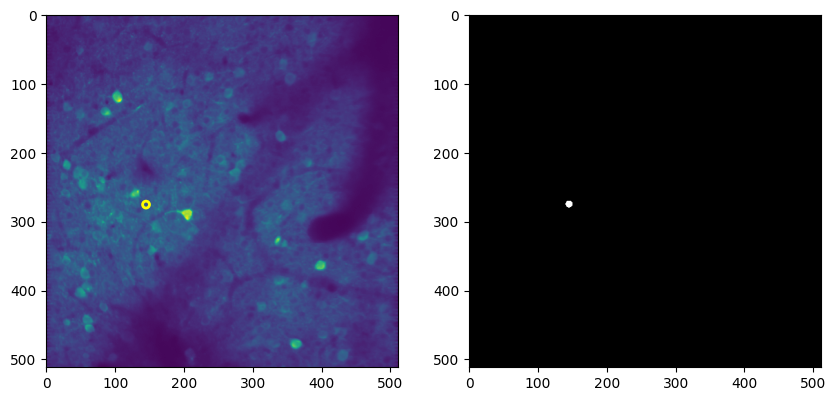

In [11]:
roi0_center = regions.PixCoord(rois[0][1], rois[0][0])
roi0_circle = regions.CirclePixelRegion(center=roi0_center, radius=5) #radius is in px
roi0_patch = roi0_circle.as_artist(facecolor='none', edgecolor='yellow', linewidth=2)
roi0_mask = roi0_circle.to_mask().to_image(stack1[0, :, :].shape)

fig, ax = plt.subplots(1, 2, figsize=(10,5))

im0 = ax[0].imshow(stack1_average)
ax[0].add_patch(roi0_patch)

im1 = ax[1].imshow(roi0_mask, cmap='Greys_r')

In [12]:
mask_activity = stack1 * roi0_mask
mask_activity[mask_activity == 0] = np.nan

Text(0.5, 0, 'Time (s)')

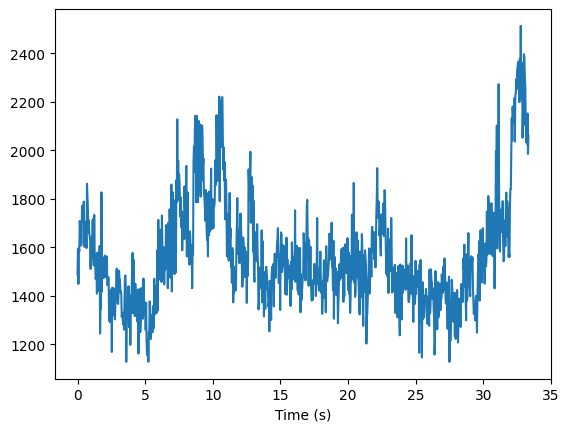

In [13]:
sampling_rate = 30
x_axis = np.linspace(0, mask_activity.shape[0]/sampling_rate, mask_activity.shape[0])
plt.plot(x_axis, np.nanmean(mask_activity, axis=(1,2)))
plt.xlabel("Time (s)")